In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv('mldata_0003161098.csv')

# Exploratory Data Analysis

In [3]:
df

Unnamed: 0  label  feature_1  feature_2  feature_3  feature_4  \
0              0      1   0.937243  -2.615394  -1.481249   3.199316   
1              1      1  -1.215560  -2.672719  -0.159421  -1.399782   
2              2      0   0.463309   2.732680   3.285768  -1.168398   
3              3      0  -1.343488  -1.642479  -3.391022  -1.101993   
4              4      1   0.149741  -2.319824   0.025210  -1.547486   
...          ...    ...        ...        ...        ...        ...   
1295        1295      1  -0.920998  -2.467124   1.001435   0.404756   
1296        1296      1  -3.755492  -2.849209   4.373984   0.000752   
1297        1297      0  -1.534639  -0.720877  -7.060296  -1.089749   
1298        1298      0   0.006703  -0.614878  -4.968763  -1.765519   
1299        1299      1  -0.000738  -1.746921  -0.747526   0.321274   

      feature_5  feature_6  feature_7  feature_8  ...  feature_26  feature_27  \
0      0.909780  -2.223163  -1.650053   3.970608  ...    0.937304    2.994973   
1      1.164249  -0.646287  -5.298321   5.030728  ...    1.066066    0.438044   
2      0.789725   1.056575   2.727508   1.866005  ...    0.340178    4.046010   
3      0.135391  -2.206274   4.401304  -1.097401  ...    1.974189   -0.894912   
4      0.857266   5.458655   0.579998   3.944001  ...    1.468232    3.123468   
...         ...        ...        ...        ...  ...         ...         ...   
1295   0.754645   0.342249  -2.821883   1.280731  ...    0.738930   -2.613735   
1296  -2.552980  -0.602929  -5.233349  -2.204912  ...    1.996971   -4.781842   
1297  -1.356322  -1.507754  -1.419370  -5.753896  ...   -0.991108   -4.843133   
1298  -0.096137  -0.455448  -1.425465   1.205484  ...    1.225006   -1.187828   
1299   0.039954  -1.352777  -3.487641  -1.654084  ...    1.374512    1.972678   

      feature_28  feature_29  feature_30  feature_31  feature_32  feature_33  \
0      -1.080917    2.979613   -2.303680    2.068353   -1.551050   -1.281454   
1       1.599696   -1.819601    0.147469    5.515508   -1.440378    0.152074   
2      -1.523665   -0.342292   -0.876130    0.046270    3.810057    4.602116   
3      -2.822201    2.689726    0.972233   -0.087160    3.526808   -2.049778   
4      -0.497040   -0.018380    0.281375    0.234587    1.500701   -1.190795   
...          ...         ...         ...         ...         ...         ...   
1295   -0.923088    0.435202    3.294188    2.908446   -2.958992   -3.995910   
1296    4.320204   -4.325057    3.266011    4.100806   -5.670978    4.389766   
1297    2.409441   -1.361118    4.618457   -0.486817   -0.285852    0.486817   
1298    3.089828   -4.052907   -0.642980    1.110752   -2.472169    3.360803   
1299    0.232236    0.086277   -2.228308   -0.927776    1.218855    2.627239   

      feature_34  feature_35  
0       2.722748    0.210766  
1      -1.095118    0.925632  
2      -0.296503    1.432394  
3      -3.065754   -2.476573  
4       1.372830   -0.756495  
...          ...         ...  
1295    3.771989    0.059613  
1296    7.074653   -2.778314  
1297   -1.685129   -3.612700  
1298    0.591599   -1.897866  
1299    2.001198    1.897996  

[1300 rows x 37 columns]

We divide the labels from the rest of the dataset obtaining X with only features and y with only labels. 

In [4]:
Labels = df['label'].tolist()

df["Labels"] = Labels

X = df.iloc[:,1:-1] 
y = df["Labels"]

In [5]:
X = X.drop(columns= 'label')

In [6]:
X

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0      0.937243  -2.615394  -1.481249   3.199316   0.909780  -2.223163   
1     -1.215560  -2.672719  -0.159421  -1.399782   1.164249  -0.646287   
2      0.463309   2.732680   3.285768  -1.168398   0.789725   1.056575   
3     -1.343488  -1.642479  -3.391022  -1.101993   0.135391  -2.206274   
4      0.149741  -2.319824   0.025210  -1.547486   0.857266   5.458655   
...         ...        ...        ...        ...        ...        ...   
1295  -0.920998  -2.467124   1.001435   0.404756   0.754645   0.342249   
1296  -3.755492  -2.849209   4.373984   0.000752  -2.552980  -0.602929   
1297  -1.534639  -0.720877  -7.060296  -1.089749  -1.356322  -1.507754   
1298   0.006703  -0.614878  -4.968763  -1.765519  -0.096137  -0.455448   
1299  -0.000738  -1.746921  -0.747526   0.321274   0.039954  -1.352777   

      feature_7  feature_8  feature_9  feature_10  ...  feature_26  \
0     -1.650053   3.970608  -1.505889    0.214524  ...    0.937304   
1     -5.298321   5.030728  -2.036553    0.808303  ...    1.066066   
2      2.727508   1.866005  -0.249372    0.532798  ...    0.340178   
3      4.401304  -1.097401   1.555069   -0.893707  ...    1.974189   
4      0.579998   3.944001  -0.733184   -0.147532  ...    1.468232   
...         ...        ...        ...         ...  ...         ...   
1295  -2.821883   1.280731  -2.422527    1.301163  ...    0.738930   
1296  -5.233349  -2.204912  -4.112136    0.356305  ...    1.996971   
1297  -1.419370  -5.753896   1.396732   -1.490271  ...   -0.991108   
1298  -1.425465   1.205484  -2.396584    3.915185  ...    1.225006   
1299  -3.487641  -1.654084  -0.714926   -0.050733  ...    1.374512   

      feature_27  feature_28  feature_29  feature_30  feature_31  feature_32  \
0       2.994973   -1.080917    2.979613   -2.303680    2.068353   -1.551050   
1       0.438044    1.599696   -1.819601    0.147469    5.515508   -1.440378   
2       4.046010   -1.523665   -0.342292   -0.876130    0.046270    3.810057   
3      -0.894912   -2.822201    2.689726    0.972233   -0.087160    3.526808   
4       3.123468   -0.497040   -0.018380    0.281375    0.234587    1.500701   
...          ...         ...         ...         ...         ...         ...   
1295   -2.613735   -0.923088    0.435202    3.294188    2.908446   -2.958992   
1296   -4.781842    4.320204   -4.325057    3.266011    4.100806   -5.670978   
1297   -4.843133    2.409441   -1.361118    4.618457   -0.486817   -0.285852   
1298   -1.187828    3.089828   -4.052907   -0.642980    1.110752   -2.472169   
1299    1.972678    0.232236    0.086277   -2.228308   -0.927776    1.218855   

      feature_33  feature_34  feature_35  
0      -1.281454    2.722748    0.210766  
1       0.152074   -1.095118    0.925632  
2       4.602116   -0.296503    1.432394  
3      -2.049778   -3.065754   -2.476573  
4      -1.190795    1.372830   -0.756495  
...          ...         ...         ...  
1295   -3.995910    3.771989    0.059613  
1296    4.389766    7.074653   -2.778314  
1297    0.486817   -1.685129   -3.612700  
1298    3.360803    0.591599   -1.897866  
1299    2.627239    2.001198    1.897996  

[1300 rows x 35 columns]

We see that our dataset is composed of 1300 rows (samples) and 35 columns (features).

In [7]:
y

0       1
1       1
2       0
3       0
4       1
       ..
1295    1
1296    1
1297    0
1298    0
1299    1
Name: Labels, Length: 1300, dtype: int64

In [8]:
# we have two classes 0 and 1

two_class = (df['label'] == 1).sum() + (df['label'] == 0).sum() 
two_class == len(df['label']) 

True

In [9]:
# here we check if the labels are balanced and they approximately are

def count_labels(labels):

    counts = {0: 0, 1: 0}
    for label in labels:
        counts[label] += 1

    return counts

label_counts = count_labels(y)
label_counts

{0: 627, 1: 673}

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

Now we scale the dataset so that the models can use the features on the same scale. Later on we can see if this change will help achieve a better outcome of the classifiers.

In [11]:
scaler = StandardScaler()

X_train_stand = scaler.fit_transform(X_train)
X_test_stand = scaler.transform(X_test)


 **Data Visualization**

 
Next we explore and visualize the features.

In [12]:
X.describe()

feature_1    feature_2    feature_3    feature_4    feature_5  \
count  1300.000000  1300.000000  1300.000000  1300.000000  1300.000000   
mean     -0.566356     0.129191     0.196357     0.821980    -0.127571   
std       1.775115     3.050466     3.526911     2.980084     2.778761   
min      -6.646419   -10.081882   -10.323029    -8.821752    -8.368149   
25%      -1.724727    -2.012691    -2.130217    -1.224660    -2.056493   
50%      -0.579524     0.127594     0.259404     0.712588    -0.097107   
75%       0.576386     2.038183     2.479237     2.909510     1.743138   
max       5.581217     9.920090    12.775897    10.093353    10.712548   

         feature_6    feature_7    feature_8    feature_9   feature_10  ...  \
count  1300.000000  1300.000000  1300.000000  1300.000000  1300.000000  ...   
mean     -0.298665     0.052267     0.017172    -0.022443     0.583439  ...   
std       2.067442     2.762758     2.530752     2.007769     2.676869  ...   
min      -6.762286   -10.148387    -7.332187    -7.556948    -8.105930  ...   
25%      -1.676313    -1.759184    -1.674201    -1.357713    -1.257787  ...   
50%      -0.259066     0.037073     0.061831     0.055413     0.485843  ...   
75%       1.130070     1.850027     1.750637     1.311333     2.278161  ...   
max       6.296261    10.260646     8.778848     6.620098     9.935662  ...   

        feature_26   feature_27   feature_28   feature_29   feature_30  \
count  1300.000000  1300.000000  1300.000000  1300.000000  1300.000000   
mean      0.901904    -0.535718    -0.305693     0.092029     0.099677   
std       2.571880     2.526094     3.283201     2.197712     2.669324   
min      -6.425440    -9.352303   -11.314936    -7.224759    -9.010750   
25%      -0.915216    -2.221973    -2.602788    -1.259135    -1.603062   
50%       0.872761    -0.544109    -0.393216     0.100612     0.087773   
75%       2.619097     1.176885     1.776607     1.504387     1.807761   
max       9.060414     6.884459    15.431812     7.397651     8.656929   

        feature_31   feature_32   feature_33   feature_34   feature_35  
count  1300.000000  1300.000000  1300.000000  1300.000000  1300.000000  
mean     -0.083089    -0.281907    -0.023506     1.100000    -0.363407  
std       2.416657     3.133058     3.199416     3.869150     2.051183  
min     -10.192388   -11.072211   -11.751840   -10.252926    -7.627106  
25%      -1.606443    -2.482143    -2.065095    -1.454753    -1.710766  
50%      -0.038457    -0.353678    -0.000936     1.066845    -0.438925  
75%       1.460015     1.838799     1.999164     3.640781     0.963206  
max       7.512347    11.238777     9.506873    14.618766    10.592790  

[8 rows x 35 columns]

It seems like the dataset follows a normal distribution.

In [13]:
# there are no missing values
X.isna().sum()

feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
feature_31    0
feature_32    0
feature_33    0
feature_34    0
feature_35    0
dtype: int64

In [14]:
# mean value of the data
mean_of_means = X.describe().loc['mean'].mean()
mean_of_means

0.023565159602039847

We will now perform a 2D plotting of the features to see if we can distinguish between the labels.

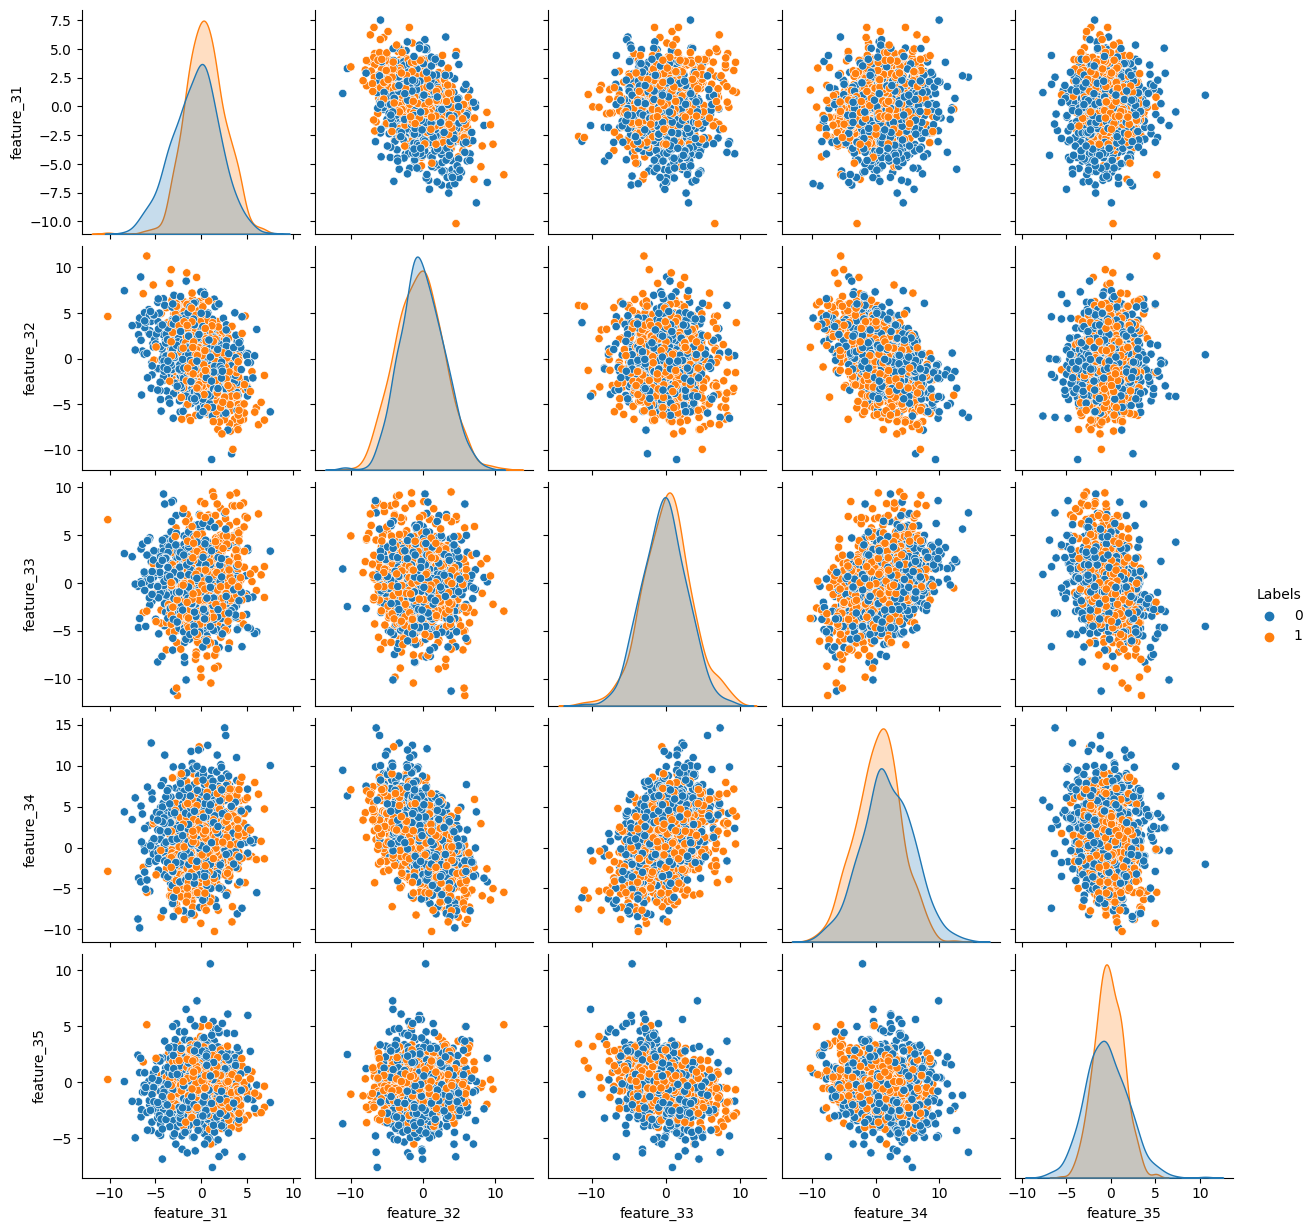

In [15]:
selected_features = X.columns[30:35].tolist()

selected_features.append('Labels')

sns.pairplot(df[selected_features], hue='Labels')
plt.show()

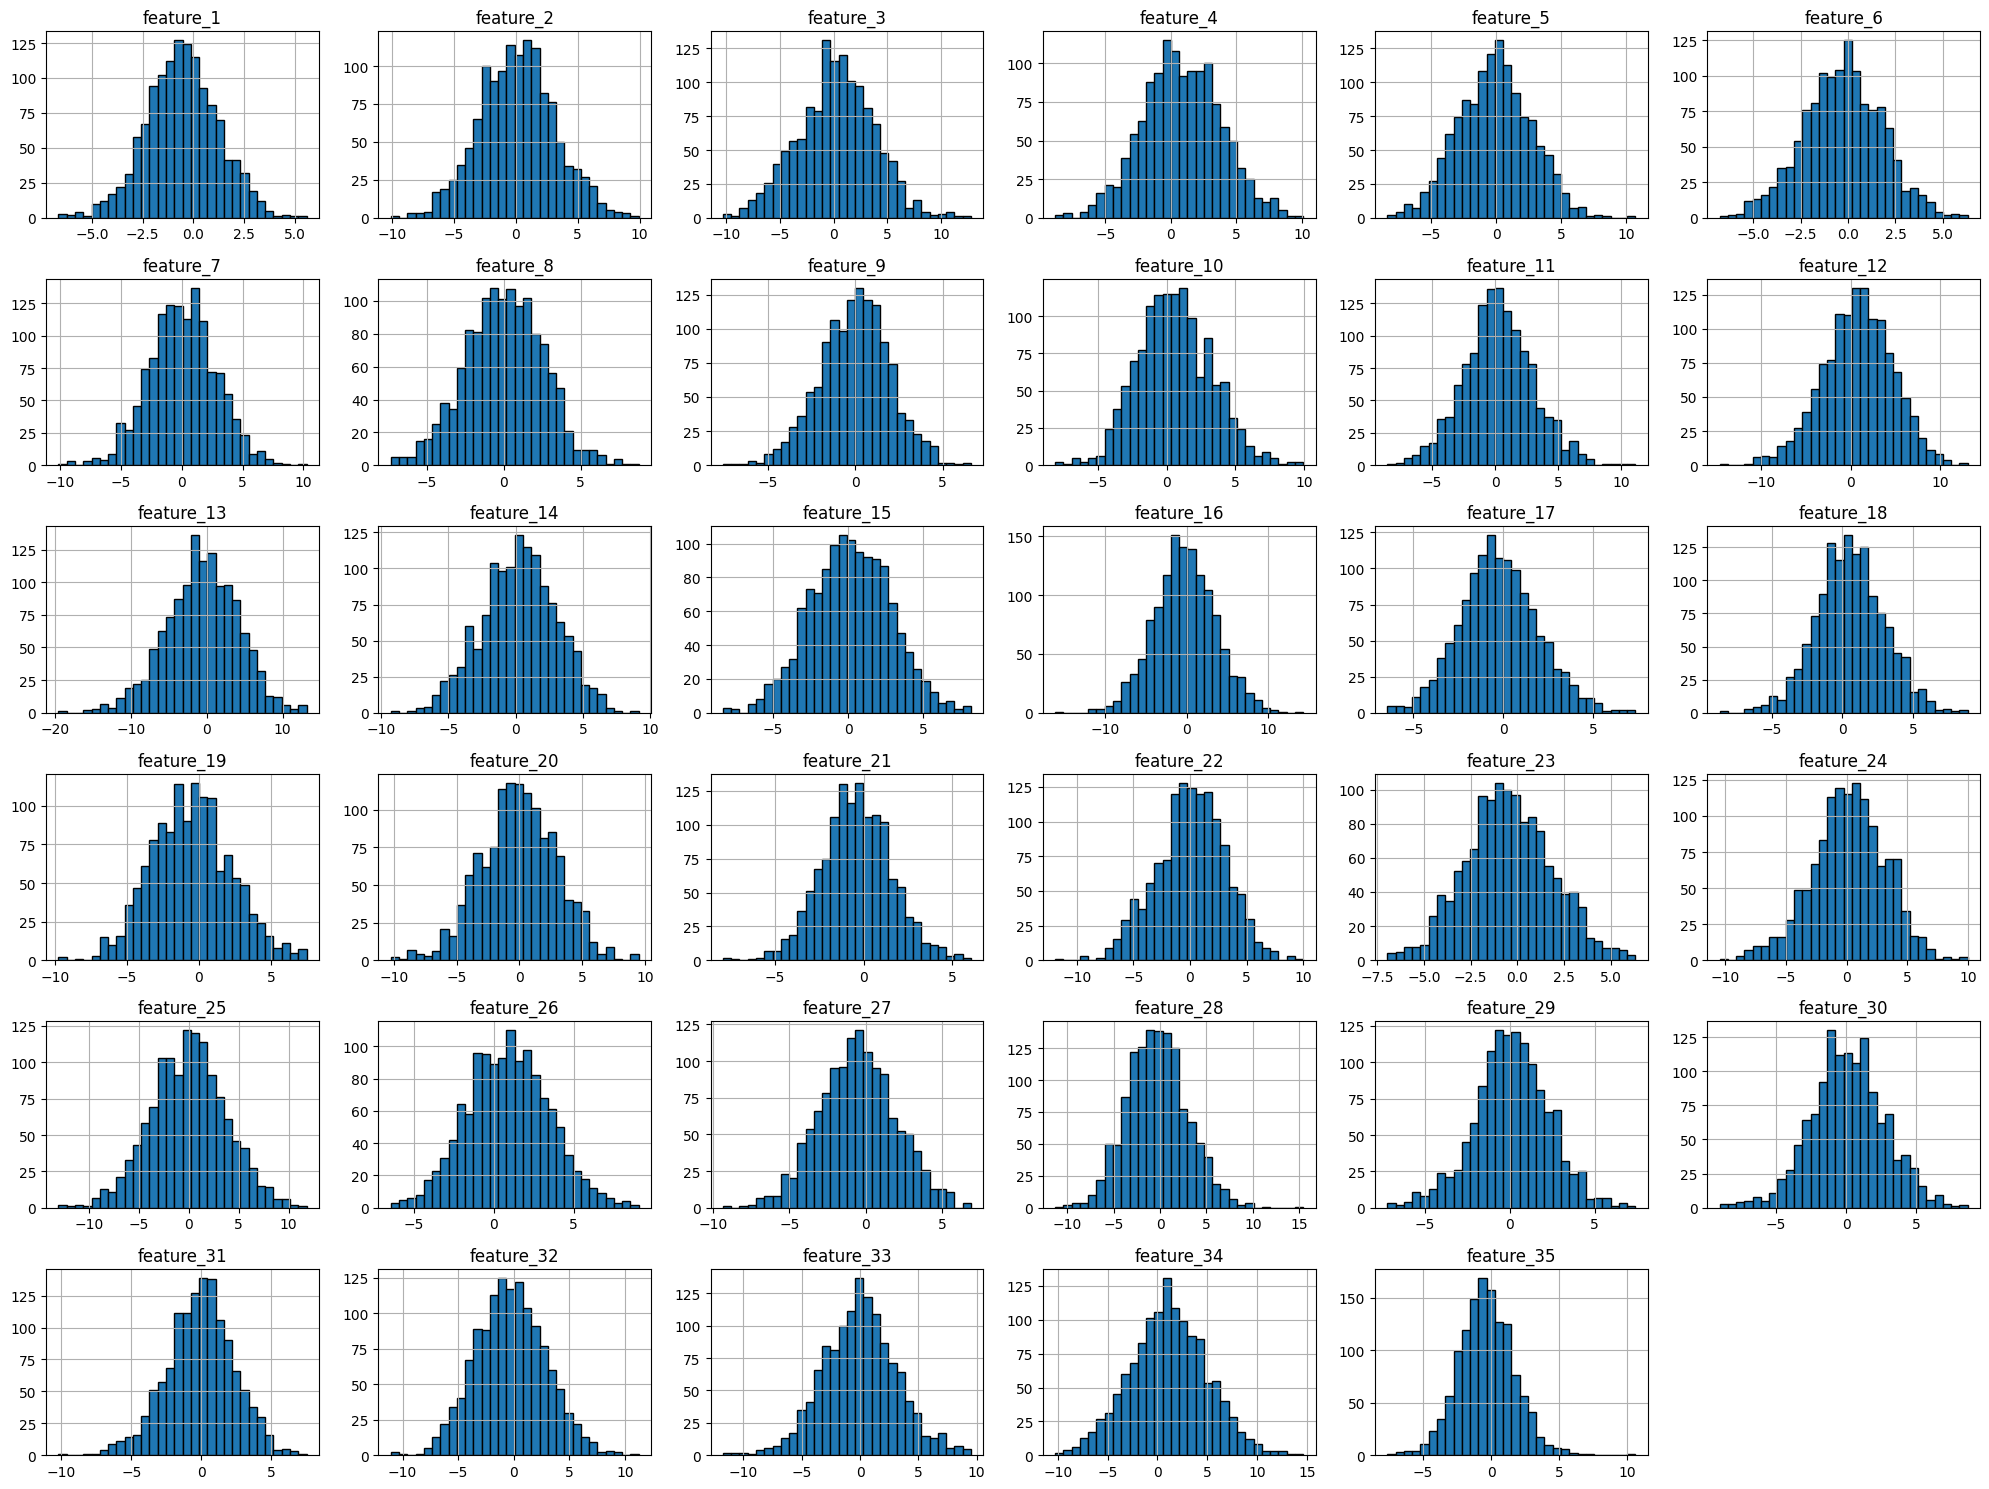

In [16]:
X.hist(bins=30, figsize=(20,15), edgecolor='black')
plt.tight_layout()  # This ensures that the plots do not overlap
plt.show()

From the plots above we can deduce that our data follows a normal distribution centered at 0. In fact, as checked before, the mean value of the data is around 0. Moreover, the scaling applied before is indeed going to be needed.

<Axes: >

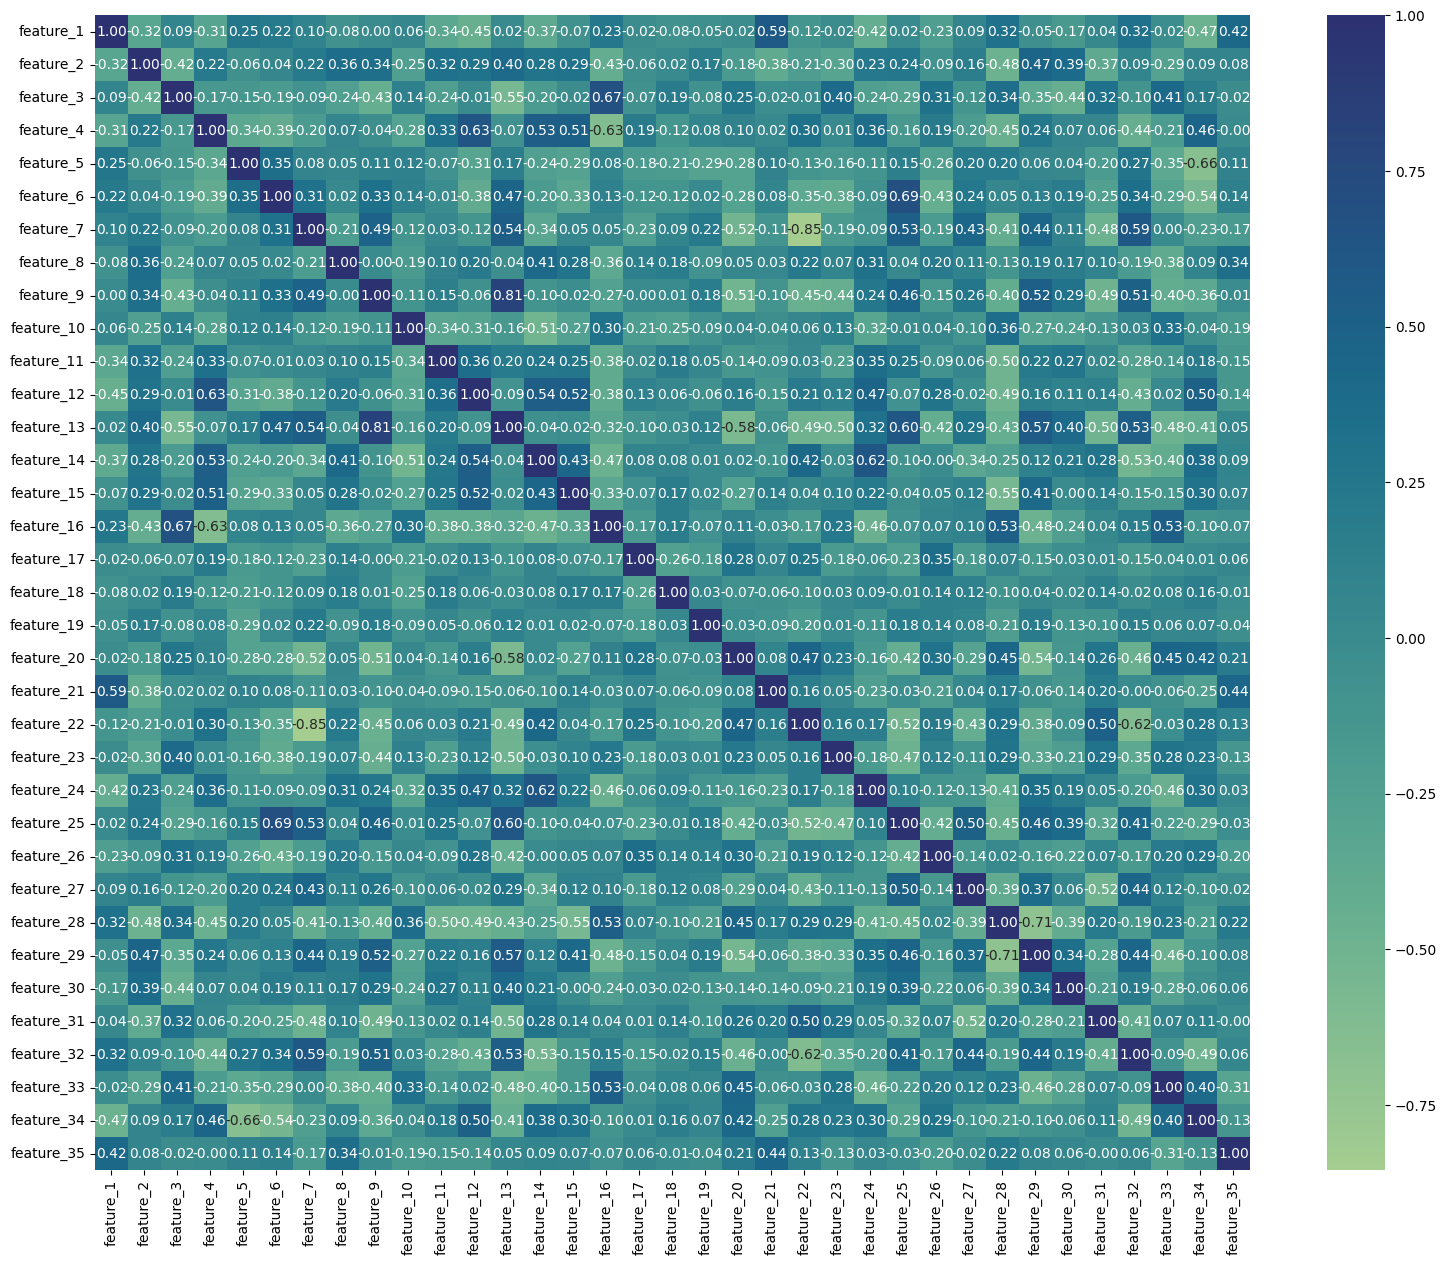

In [17]:
# Correlation matrix
f, ax = plt.subplots(figsize=(20, 15))

corr = X.corr()
sns.heatmap(corr, vmax=1, cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size': 10}, cmap = 'crest')

From this plot we can deduce that there is a large number of features which are almost perfectly uncorrelated.

#Dimensionality reduction

We try using dimensionality reduction through PCA to see if we can distinguish the two labels.

Text(0, 0.5, 'Variance explained')

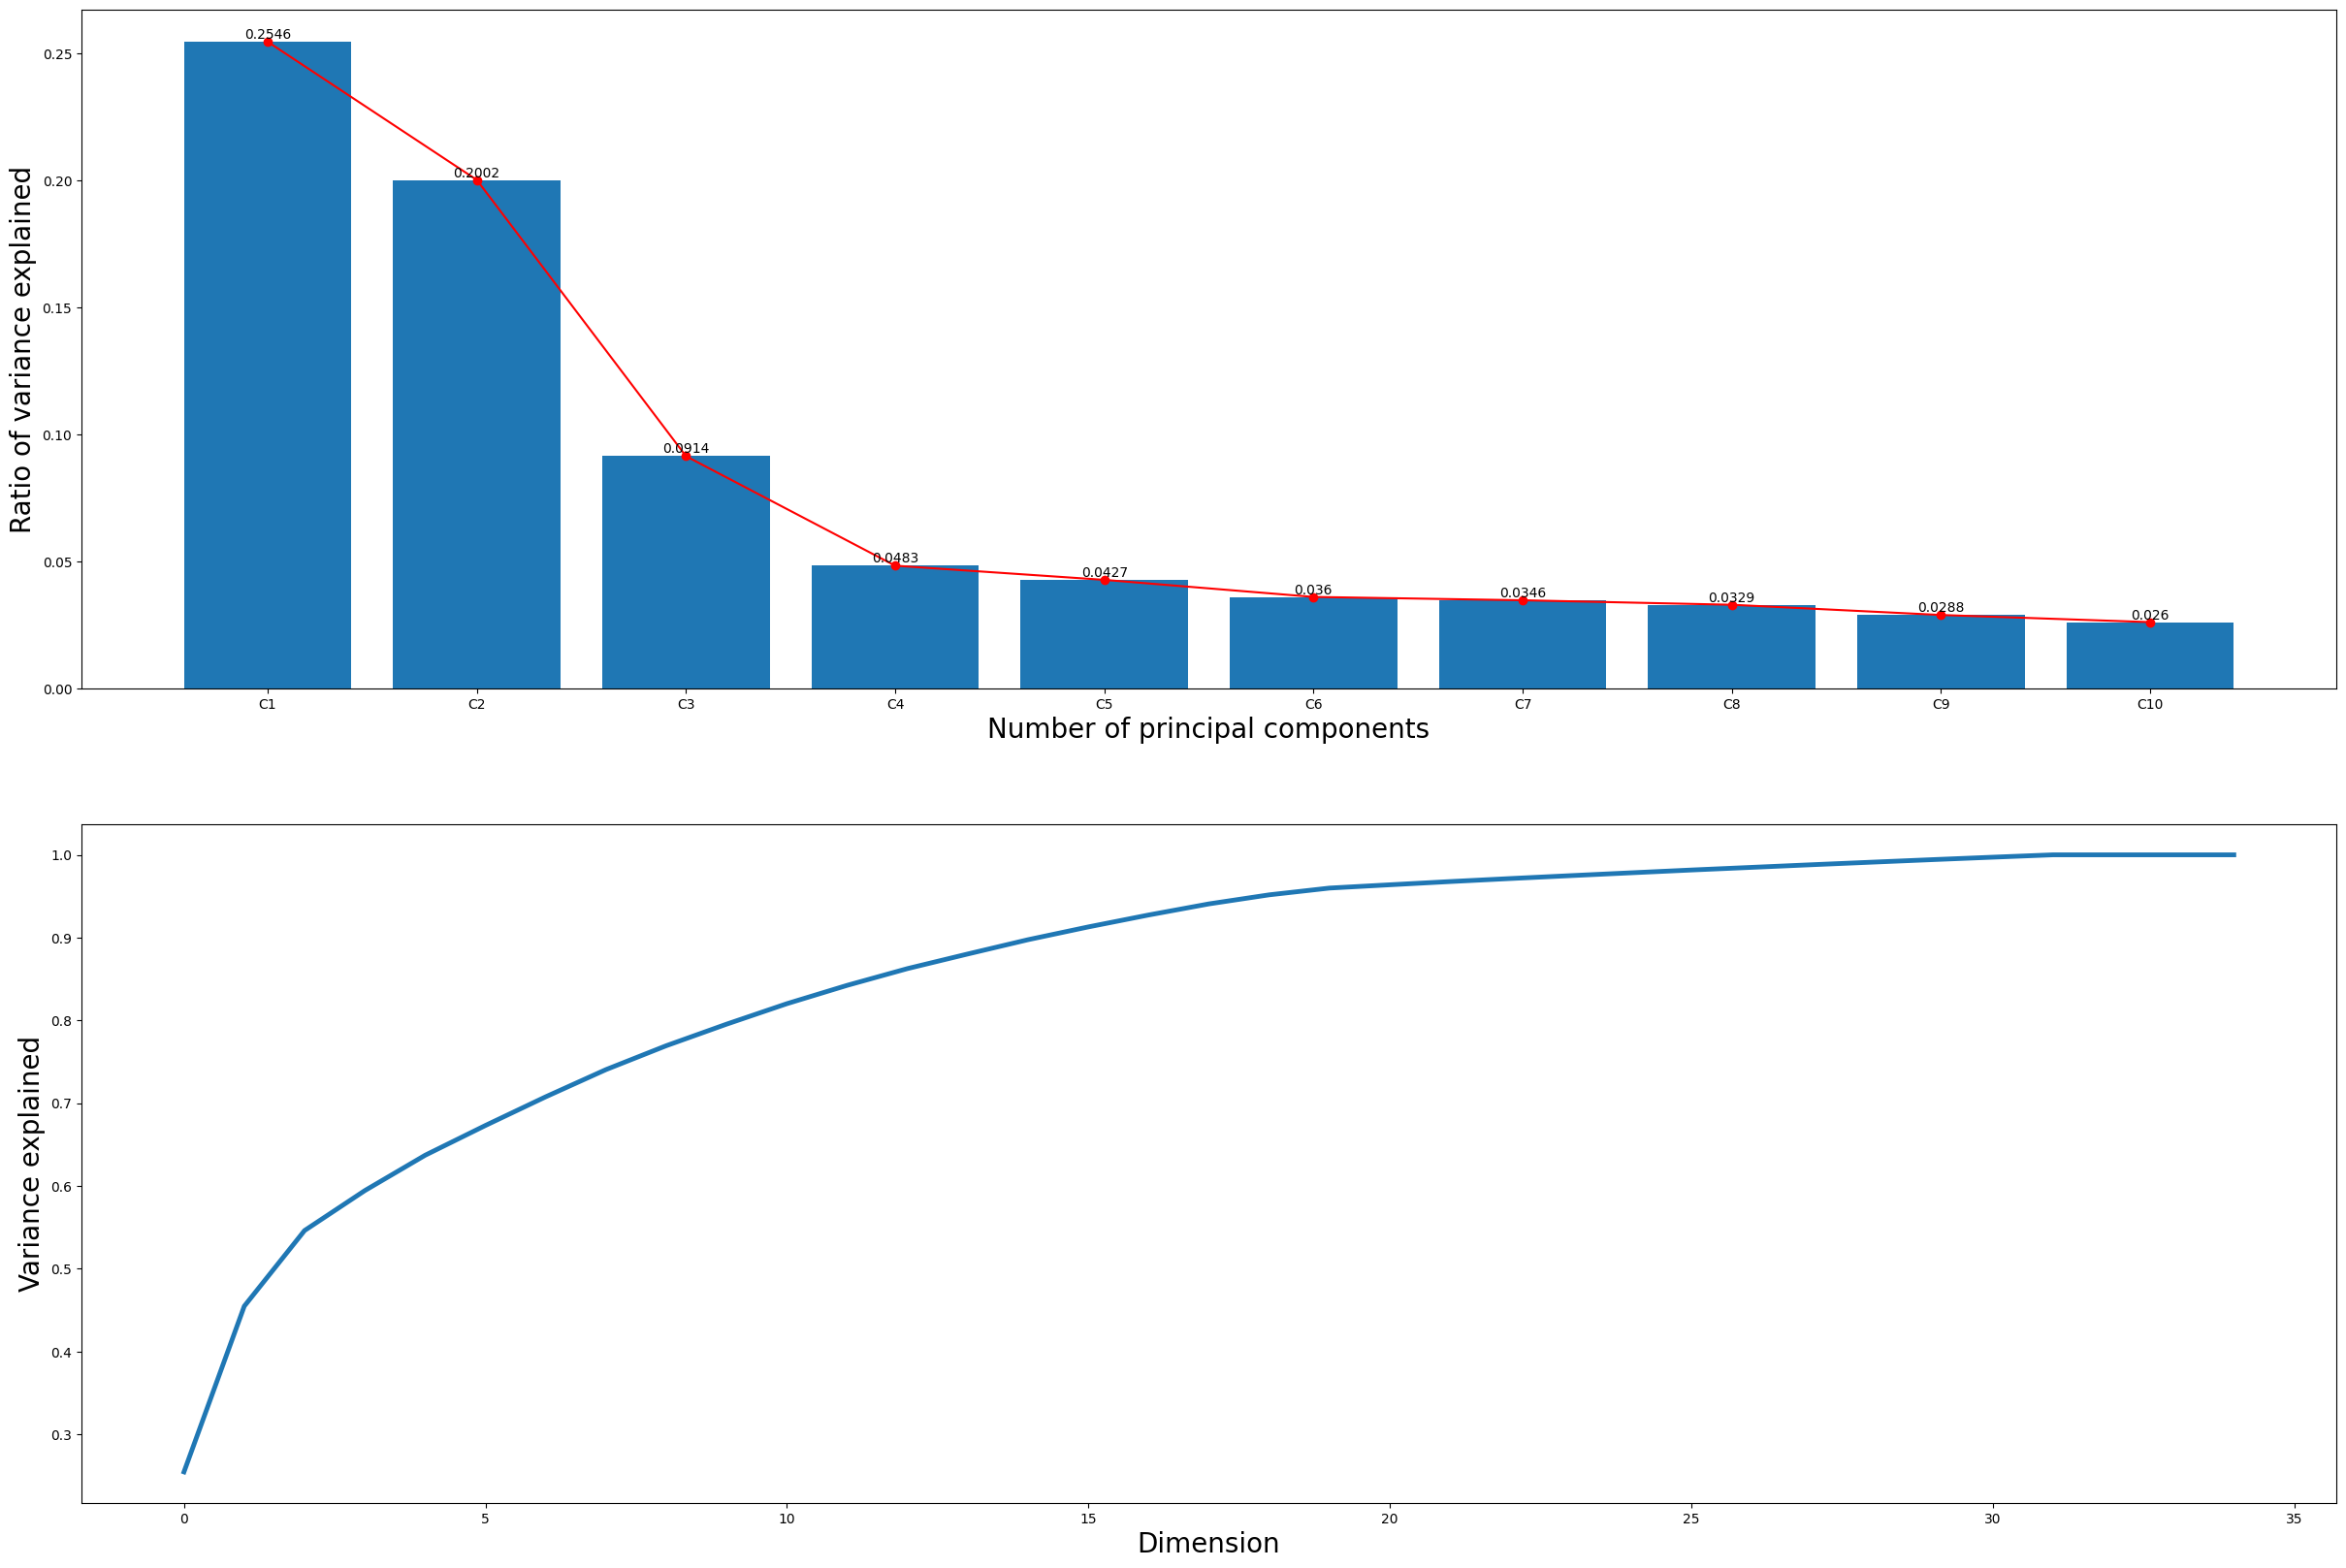

In [18]:
pca = PCA()
reduced = pca.fit_transform(X)
var_ratio = pca.explained_variance_ratio_
var_ratio_first = pca.explained_variance_ratio_[0:10]
lab0 = [f"C{i+1}" for i in range(10)]
fig,ax= plt.subplots(2,1,figsize=(30,20))

ax[0].bar(lab0,var_ratio_first)
rects = ax[0].patches
labels = var_ratio_first.round(4) 
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax[0].text(rect.get_x() + rect.get_width() / 2, height+0.0001, label,
            ha='center', va='bottom')
ax[0].plot([(rect.get_x() + rect.get_width() / 2) for rect in rects],var_ratio_first, color='Red', marker='o')
ax[0].set_xlabel('Number of principal components',fontsize=20)
ax[0].set_ylabel('Ratio of variance explained',fontsize=20)

cumulative = np.cumsum(var_ratio)
ax[1].plot(cumulative, linewidth = 3.5)
ax[1].set_xlabel('Dimension',fontsize=20)
ax[1].set_ylabel('Variance explained',fontsize=20)

These graphs illustrate the accounted variance from the most important components. 

Finding an elbow in the cumulative variance graph is not very easy. Actually, just after the initial three components, the graph starts to reveal a pretty much steady increase in cumulative variance.

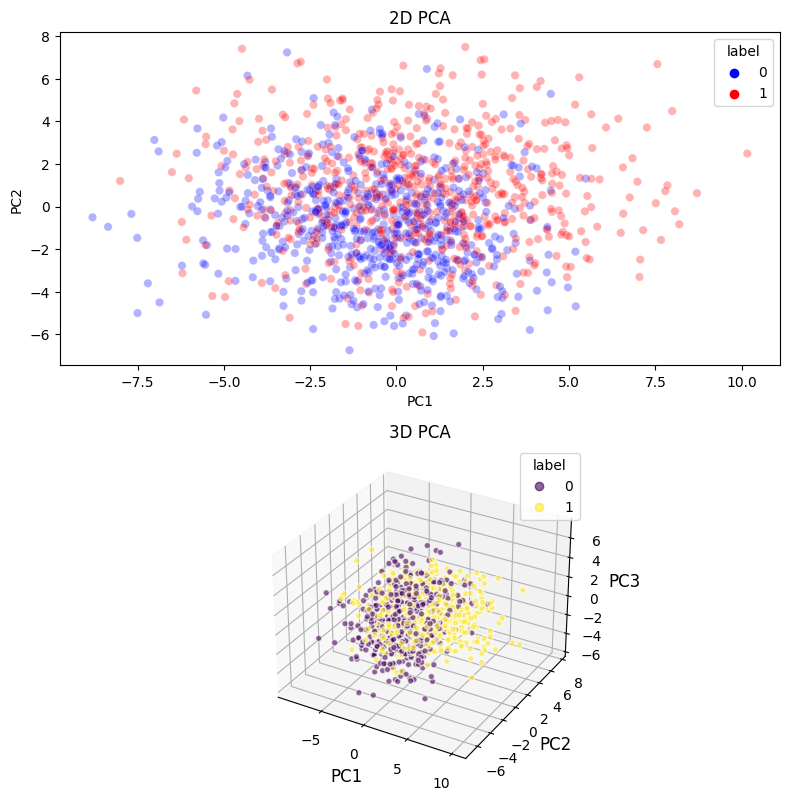

In [19]:
# Standardizing the features before performing PCA
scaler = StandardScaler()
X_stand = scaler.fit_transform(X)

# 2D PCA
pca2D = PCA(n_components=2)
data_red2D = pca2D.fit_transform(X_stand)

df_pca_2D = pd.DataFrame(data=data_red2D, columns=['PC1', 'PC2'])

df_pca_2D = pd.concat([df_pca_2D, df['label']], axis=1)

# 3D PCA
pca3D = PCA(n_components=3)
data_red3D = pca3D.fit_transform(X_stand)

df_pca_3D = pd.DataFrame(data=data_red3D, columns=['PC1', 'PC2', 'PC3'])

df_pca_3D = pd.concat([df_pca_3D, df['label']], axis=1)

fig = plt.figure(figsize=(8, 8))

# 2D subplot
ax1 = plt.subplot2grid((2, 1), (0, 0))
sns.scatterplot(data=df_pca_2D, x='PC1', y='PC2', hue='label', palette=['blue', 'red'], alpha=0.3, ax=ax1)
ax1.set_title('2D PCA')

# 3D subplot
ax2 = plt.subplot2grid((2, 1), (1, 0), projection='3d')
scatter = ax2.scatter(df_pca_3D['PC1'], df_pca_3D['PC2'], df_pca_3D['PC3'], c=df_pca_3D['label'], alpha=0.6, edgecolors='w')
ax2.set_xlabel('PC1', fontsize=12)
ax2.set_ylabel('PC2', fontsize=12)
ax2.set_zlabel('PC3', fontsize=12)
ax2.set_title('3D PCA')

ax2.legend(*scatter.legend_elements(), title="label")

plt.tight_layout()

plt.show()

Now we implement an interactive 3d plot to better explore.

In [20]:
fig = px.scatter_3d(df_pca_3D, x='PC1', y='PC2', z='PC3', color='label',  title = "Interactive PCA plot with supervised labels")
fig.show()

The plots shown above, taking the first two and three principal components, don't help us identify clearly clusters of data. Therefore we try applying t-SNE.

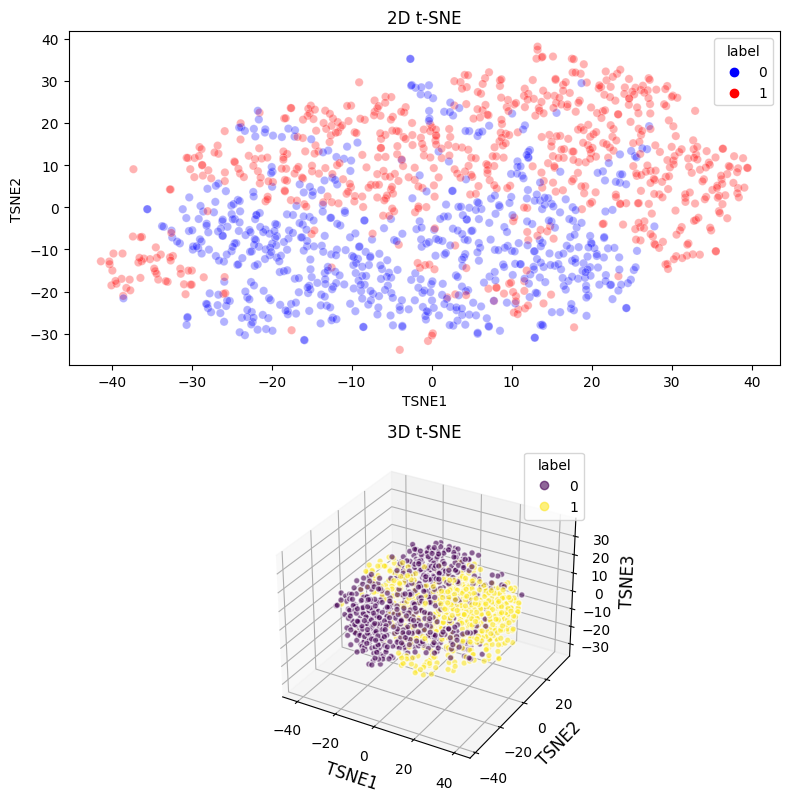

In [21]:
tsne2 = TSNE(n_components=2)
red_tsne2 = tsne2.fit_transform(X_stand)

df_tsne2 = pd.DataFrame(data=red_tsne2, columns=['TSNE1', 'TSNE2'])

df_tsne2 = pd.concat([df_tsne2, df['label']], axis=1)

tsne3 = TSNE(n_components=3)
red_tsne3 = tsne3.fit_transform(X_stand)

df_tsne3 = pd.DataFrame(data=red_tsne3, columns=['TSNE1', 'TSNE2', 'TSNE3'])

df_tsne3 = pd.concat([df_tsne3, df['label']], axis=1)

fig = plt.figure(figsize=(8, 8))

# 2D subplot
ax1 = plt.subplot2grid((2, 1), (0, 0))
sns.scatterplot(data=df_tsne2, x='TSNE1', y='TSNE2', hue='label', palette=['blue', 'red'], alpha=0.3, ax=ax1)
ax1.set_title('2D t-SNE')

# 3D subplot
ax2 = plt.subplot2grid((2, 1), (1, 0), projection='3d')
scatter = ax2.scatter(df_tsne3['TSNE1'], df_tsne3['TSNE2'], df_tsne3['TSNE3'], c=df_tsne3['label'], alpha=0.6, edgecolors='w')
ax2.set_xlabel('TSNE1', fontsize=12)
ax2.set_ylabel('TSNE2', fontsize=12)
ax2.set_zlabel('TSNE3', fontsize=12)
ax2.set_title('3D t-SNE')

ax2.legend(*scatter.legend_elements(), title="label")

plt.tight_layout()
plt.show()

From the plots shown above we can rougly see two groups but we can't deduce anything conclusive regarding the dividion of the data. 
In the next section we will build two classifiers, Linear SVM and Random Forest, to try to predict the labels.

# Classifiers

##SVM

Now we implement SVM on the two datasets trying to make predictions for the labels on the data. First we try SVM with LinarSVC.

Original dataset

In [22]:
svm_or = LinearSVC(C = 0.1, penalty = 'l1', dual = False, class_weight = 'balanced', max_iter = 100000)
svm_or.fit(X_train, y_train)

LinearSVC(C=0.1, class_weight='balanced', dual=False, max_iter=100000,
          penalty='l1')

In [23]:
svm_check = svm_or.predict(X_train)

In [24]:
svm_check_acc = metrics.accuracy_score(y_train, svm_check)
svm_check_acc

0.8634615384615385

In [25]:
svm_or_preds = svm_or.predict(X_test)

In [26]:
svm_or_acc = metrics.accuracy_score(y_test, svm_or_preds)
svm_or_acc

0.8192307692307692

Scaled datatest

In [27]:
svm_stand = LinearSVC(C = 0.1, penalty = 'l1', dual = False, class_weight = 'balanced', max_iter = 100000)
svm_stand.fit(X_train_stand, y_train)

LinearSVC(C=0.1, class_weight='balanced', dual=False, max_iter=100000,
          penalty='l1')

In [28]:
svm_check_stand = svm_stand.predict(X_train_stand)

In [29]:
svm_check_acc_stand = metrics.accuracy_score(y_train, svm_check_stand)
svm_check_acc_stand

0.8634615384615385

In [30]:
svm_stand_preds = svm_stand.predict(X_test_stand)

In [31]:
svm_stand_acc = metrics.accuracy_score(y_test, svm_stand_preds)
svm_stand_acc

0.8115384615384615

The predictions are approximately equal in both datasets (0.81). Next, we try tuning the parameters with GridSearch using the original dataset to try to increase the accuracy.

**Hyperparameters' Tuning**

In [32]:
svm_params = {'C': [0.1, 1, 2, 10, 100, 1000], 'loss':['squared_hinge', 'hinge']}

svm = LinearSVC( dual = True, penalty = 'l2', class_weight = 'balanced', max_iter = 10000,  random_state = 45)

grid_svm = GridSearchCV(estimator=svm, param_grid=svm_params,refit=True, verbose=2)

grid_svm.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..........................C=0.1, loss=squared_hinge; total time=   0.2s
[CV] END ..........................C=0.1, loss=squared_hinge; total time=   0.2s
[CV] END ..........................C=0.1, loss=squared_hinge; total time=   0.2s
[CV] END ..........................C=0.1, loss=squared_hinge; total time=   0.2s
[CV] END ..........................C=0.1, loss=squared_hinge; total time=   0.1s
[CV] END ..................................C=0.1, loss=hinge; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ..................................C=0.1, loss=hinge; total time=   0.1s
[CV] END ..................................C=0.1, loss=hinge; total time=   0.1s
[CV] END ..................................C=0.1, loss=hinge; total time=   0.1s
[CV] END ..................................C=0.1, loss=hinge; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ............................C=1, loss=squared_hinge; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ............................C=1, loss=squared_hinge; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ............................C=1, loss=squared_hinge; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ............................C=1, loss=squared_hinge; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ............................C=1, loss=squared_hinge; total time=   0.8s
[CV] END ....................................C=1, loss=hinge; total time=   0.1s
[CV] END ....................................C=1, loss=hinge; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ....................................C=1, loss=hinge; total time=   0.1s
[CV] END ....................................C=1, loss=hinge; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ....................................C=1, loss=hinge; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ............................C=2, loss=squared_hinge; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ............................C=2, loss=squared_hinge; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ............................C=2, loss=squared_hinge; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ............................C=2, loss=squared_hinge; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ............................C=2, loss=squared_hinge; total time=   1.0s
[CV] END ....................................C=2, loss=hinge; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ....................................C=2, loss=hinge; total time=   0.2s
[CV] END ....................................C=2, loss=hinge; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ....................................C=2, loss=hinge; total time=   0.2s
[CV] END ....................................C=2, loss=hinge; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ...........................C=10, loss=squared_hinge; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ...........................C=10, loss=squared_hinge; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ...........................C=10, loss=squared_hinge; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ...........................C=10, loss=squared_hinge; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ...........................C=10, loss=squared_hinge; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ...................................C=10, loss=hinge; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ...................................C=10, loss=hinge; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ...................................C=10, loss=hinge; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ...................................C=10, loss=hinge; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ...................................C=10, loss=hinge; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ..........................C=100, loss=squared_hinge; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ..........................C=100, loss=squared_hinge; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ..........................C=100, loss=squared_hinge; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ..........................C=100, loss=squared_hinge; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ..........................C=100, loss=squared_hinge; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ..................................C=100, loss=hinge; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ..................................C=100, loss=hinge; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ..................................C=100, loss=hinge; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ..................................C=100, loss=hinge; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END ..................................C=100, loss=hinge; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END .........................C=1000, loss=squared_hinge; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END .........................C=1000, loss=squared_hinge; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END .........................C=1000, loss=squared_hinge; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END .........................C=1000, loss=squared_hinge; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END .........................C=1000, loss=squared_hinge; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END .................................C=1000, loss=hinge; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END .................................C=1000, loss=hinge; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END .................................C=1000, loss=hinge; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV] END .................................C=1000, loss=hinge; total time=   0.8s
[CV] END .................................C=1000, loss=hinge; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



GridSearchCV(estimator=LinearSVC(class_weight='balanced', max_iter=10000,
                                 random_state=45),
             param_grid={'C': [0.1, 1, 2, 10, 100, 1000],
                         'loss': ['squared_hinge', 'hinge']},
             verbose=2)

In [33]:
grid_svm.best_params_

{'C': 2, 'loss': 'hinge'}

In [34]:
svm_grid = LinearSVC( loss='hinge', C=2, penalty = 'l2',class_weight = 'balanced', max_iter = 1000000, random_state = 45)
    
svm_grid.fit(X_train, y_train)

svm_grid_preds = svm_grid.predict(X_test)

In [35]:
svm_grid_acc = metrics.accuracy_score(y_test, svm_grid_preds)
svm_grid_acc

0.823076923076923

We get a slight increase in the accuracy after implementing GridSearch. Next we print the classification report and plot the confusion matrix and the Receiver Operating Characteristic curve to learn more about the precision of this model. 

Classification report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       113
           1       0.86      0.82      0.84       147

    accuracy                           0.82       260
   macro avg       0.82      0.82      0.82       260
weighted avg       0.83      0.82      0.82       260

Confusion matrix:
 [[ 94  19]
 [ 27 120]]


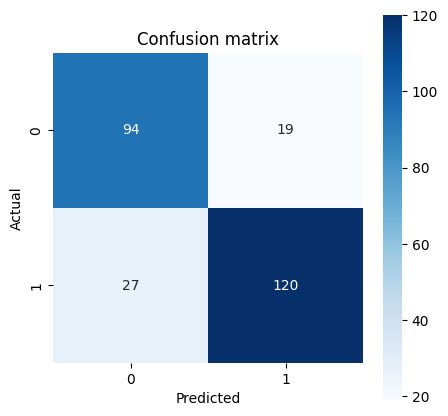

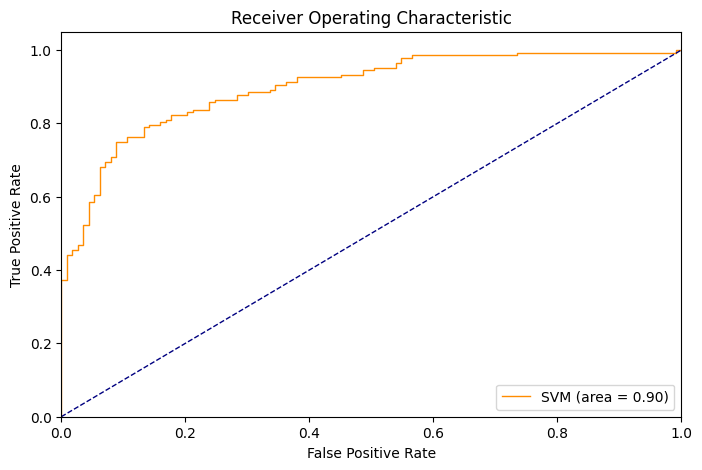

In [36]:
# Classification report
print('Classification report:\n', classification_report(y_test, svm_grid_preds))

# Confusion matrix
conf_mat = confusion_matrix(y_test, svm_grid_preds)
print('Confusion matrix:\n', conf_mat)

# Plotting the confusion matrix with a heatmap
plt.figure(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt=".0f", square = True, cmap = 'Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.show()

# Plotting ROC curves
plt.figure(figsize=(8,5))
probs = grid_svm.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=1, label='SVM (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Precision: The ability of a classifier to avoid labeling a negative sample as positive. If precision is high, that means the classifier does a good job of not misclassifying negative instances.


Recall: The ability of a classifier to find all the positive instances. If recall is high, that means the classifier does a good job of finding positive instances.


F1-score: The harmonic mean of precision and recall. It tries to balance these two values. A high F1 score means that both precision and recall are high.


Support: Support is the number of actual occurrences of the class in the specified dataset. 




In our case we get high values that suggest the model is making correct predictions more often.


The confusion matrix indicates that we accurately predicted the majority of instances. The ROC curve illustrates the true positive rate plotted against the false positive rate at different threshold settings. The area under the ROC curve indicates the model's performance, with a high value indicating a better model—this is the case for us.

###SVM with Kernels

Now, to try to get an even higher accuracy we implement SVM with different kernels.

In [37]:
# Original dataset
svm_ker_or = SVC(gamma = 'scale', class_weight='balanced', random_state= 45) 
svm_ker_or.fit(X_train, y_train)
svm_ker_or_preds = svm_ker_or.predict(X_test)
svm_ker_or_acc = metrics.accuracy_score(y_test, svm_ker_or_preds)
print('Kernel SVM Accuracy (Original):', svm_ker_or_acc)

# Scaled dataset
svm_ker_stand = SVC(gamma = 'scale', class_weight='balanced', random_state= 45)
svm_ker_stand.fit(X_train_stand, y_train)
svm_ker_stand_preds = svm_ker_stand.predict(X_test_stand)
svm_ker_stand_acc = metrics.accuracy_score(y_test, svm_ker_stand_preds)
print('Kernel SVM Accuracy (Scaled):', svm_ker_stand_acc)


Kernel SVM Accuracy (Original): 0.95
Kernel SVM Accuracy (Scaled): 0.9538461538461539


**Hyperparameters' Tuning**

This already improves the accuracy by 0.13 percetage points! How does this change when we apply GridSearch randomized with the scaled dataset?



In [38]:
svm = SVC(gamma="scale")

params = {'gamma':  np.logspace(-4, 4, 100) , 'C': np.logspace(-4, 4, 100)}
svm_random = RandomizedSearchCV(svm, params, n_iter=4000, verbose=1, cv=5)
svm_random.fit(X_train_stand, y_train)

svm_random.best_params_


Fitting 5 folds for each of 4000 candidates, totalling 20000 fits


{'gamma': 0.06734150657750829, 'C': 1.9179102616724888}


Next we use the best estimators found after some tries of Randomized Search.

In [39]:
svm_opt = SVC ( C =  1.592282793341094, gamma= 0.08111308307896872, kernel = 'rbf', random_state = 45 )
svm_opt.fit(X_train_stand, y_train)

svm_opt_preds = svm_opt.predict(X_test_stand)

In [40]:
svm_opt_acc = metrics.accuracy_score(y_test, svm_opt_preds)
svm_opt_acc

0.9615384615384616

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       113
           1       0.99      0.94      0.97       147

    accuracy                           0.96       260
   macro avg       0.96      0.96      0.96       260
weighted avg       0.96      0.96      0.96       260

Confusion matrix:
 [[112   1]
 [  9 138]]


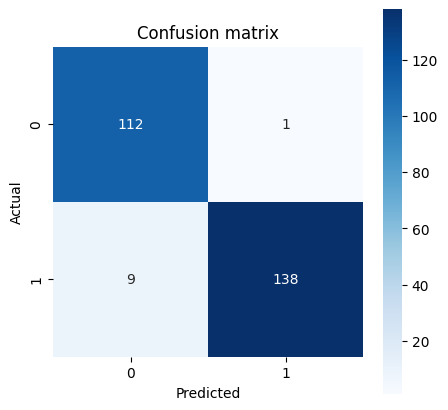

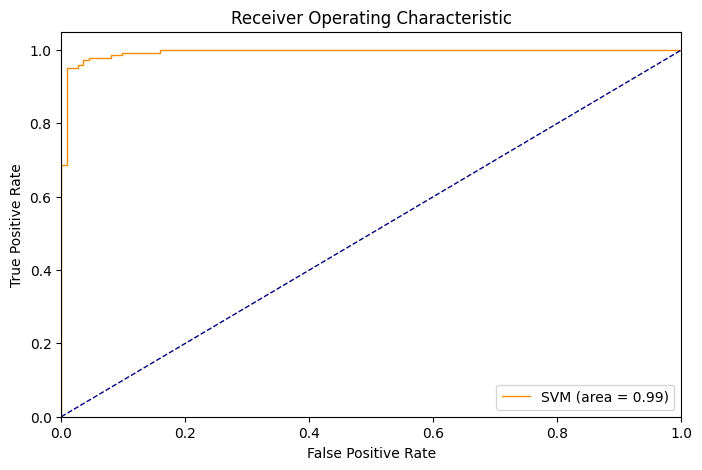

In [41]:
# Classification report 
print('Classification report:\n', classification_report(y_test, svm_opt_preds))

# Confusion matrix
conf_mat = confusion_matrix(y_test, svm_opt_preds)
print('Confusion matrix:\n', conf_mat)

# Plotting the confusion matrix with a heatmap
plt.figure(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt=".0f", square = True, cmap = 'Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.show()

# Plotting ROC curves
plt.figure(figsize=(8,5))
probs = svm_random.decision_function(X_test_stand)
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=1, label='SVM (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


The classification report, confusion matrix and the ROC curve significantly improved. Therefore, we can deduce that this last model worked better.

Using Grid Search and Randomized Grid Search, we chose to select a number of iterations that is neither too small nor too high in order to optimize the most important parameters while considering the running time. We tried to  achieve the best possible performance in the least amount
of time.

## Random Forest


Now we implement a random forest classifier.

Original dataset

In [42]:
rfc_or = RandomForestClassifier(random_state=45)

rfc_or.fit(X_train, y_train)

y_pred_or = rfc_or.predict(X_test)

accuracy_or = accuracy_score(y_test, y_pred_or)
accuracy_or

0.8769230769230769

Scaled dataset

In [43]:
rfc_stand = RandomForestClassifier(random_state=45)

rfc_stand.fit(X_train_stand, y_train)

y_pred_stand = rfc_stand.predict(X_test_stand)

accuracy_stand = accuracy_score(y_test, y_pred_stand)
accuracy_stand

0.8769230769230769

The accuracies are all equal. Now we apply GridSearch to the original dataset to see if we can get a higher accuracy.

**Hyperparameters' Tuning**

In [44]:
param_grid = {
    'criterion': ["gini", "entropy"],
    'n_estimators': [900, 500, 300],
    'max_depth': [10, 20, 30, None],
}

grid_randomf = GridSearchCV(estimator= rfc_or, param_grid=param_grid, cv=3, verbose=2,  n_jobs=-1)
grid_randomf.fit(X_train, y_train)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=45), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, None],
                         'n_estimators': [900, 500, 300]},
             verbose=2)

In [45]:
grid_randomf.best_params_

{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 900}

In [46]:
best_randomf = grid_randomf.best_estimator_

y_pred_randomf = best_randomf.predict(X_test)

best_accuracy = accuracy_score(y_test, y_pred_randomf)
best_accuracy

0.8538461538461538

In [47]:
# Classification report
print('Classification report:\n', classification_report(y_test, y_pred_randomf))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_randomf)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       113
           1       0.89      0.84      0.87       147

    accuracy                           0.85       260
   macro avg       0.85      0.86      0.85       260
weighted avg       0.86      0.85      0.85       260

Confusion matrix:
 [[ 98  15]
 [ 23 124]]


After many tries, this approach doesn't seem to produce a higher accuracy. As a consequence, we try implementing Randomized Grid Search. 

In [48]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 800, num = 100)]

min_samples_split = [2, 5]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=45, n_jobs = -1)

rf_random.fit(X_train, y_train)

print("Best parameters found: ", rf_random.best_params_)



Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'n_estimators': 361, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False}


Next we use the best estimators found after some tries of Randomized Search.

In [49]:
random_srch = RandomForestClassifier(n_estimators = 389, min_samples_split = 2, min_samples_leaf = 1, random_state=45, bootstrap = False)

random_srch.fit(X_train, y_train)

random_srch_preds = random_srch.predict(X_test)

In [50]:
random_srch_acc = metrics.accuracy_score(y_test, random_srch_preds)
random_srch_acc

0.8807692307692307

In [51]:
# Classification report
print('Classification report:\n', classification_report(y_test,random_srch_preds))

# Confusion matrix
conf_mat = confusion_matrix(y_test, random_srch_preds)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       113
           1       0.90      0.89      0.89       147

    accuracy                           0.88       260
   macro avg       0.88      0.88      0.88       260
weighted avg       0.88      0.88      0.88       260

Confusion matrix:
 [[ 98  15]
 [ 16 131]]


We get a increase in the accuracy, from approximately 87% to 88%. From the classification report and the confusion matrix we can deduce that this tuning of the parameters is actually working better than GridSearch. 

Next, to better understand the choice of the n_estimators, we plot the accuracy against the number of estimators.

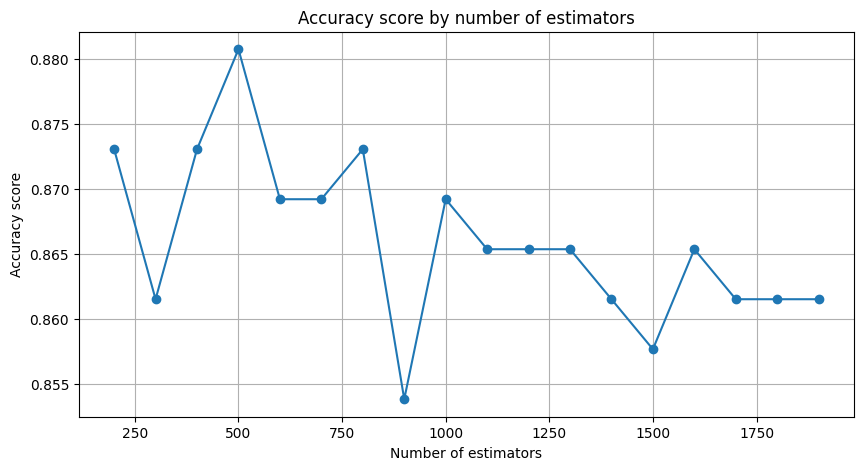

In [52]:
accuracy_scores = []

n_estimators_range = range(200, 2000, 100)

for n in n_estimators_range:

    rfc = RandomForestClassifier(n_estimators=n, random_state=45)
    rfc.fit(X_train, y_train)
    
    y_pred = rfc.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 5))
plt.plot(n_estimators_range, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy score by number of estimators')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy score')
plt.grid()
plt.show()

This suggests that the optimal quantity of estimators is 500, which is approximately around what we get after a few tries of Randomized GridSearch. This number of estimators paired with the other parameters, turns out to be a good pick. This strategy leads in fact to a good increase in accuracy.

Here follows the plot of a tree from the random forest.

In [53]:
best_random = rf_random.best_estimator_

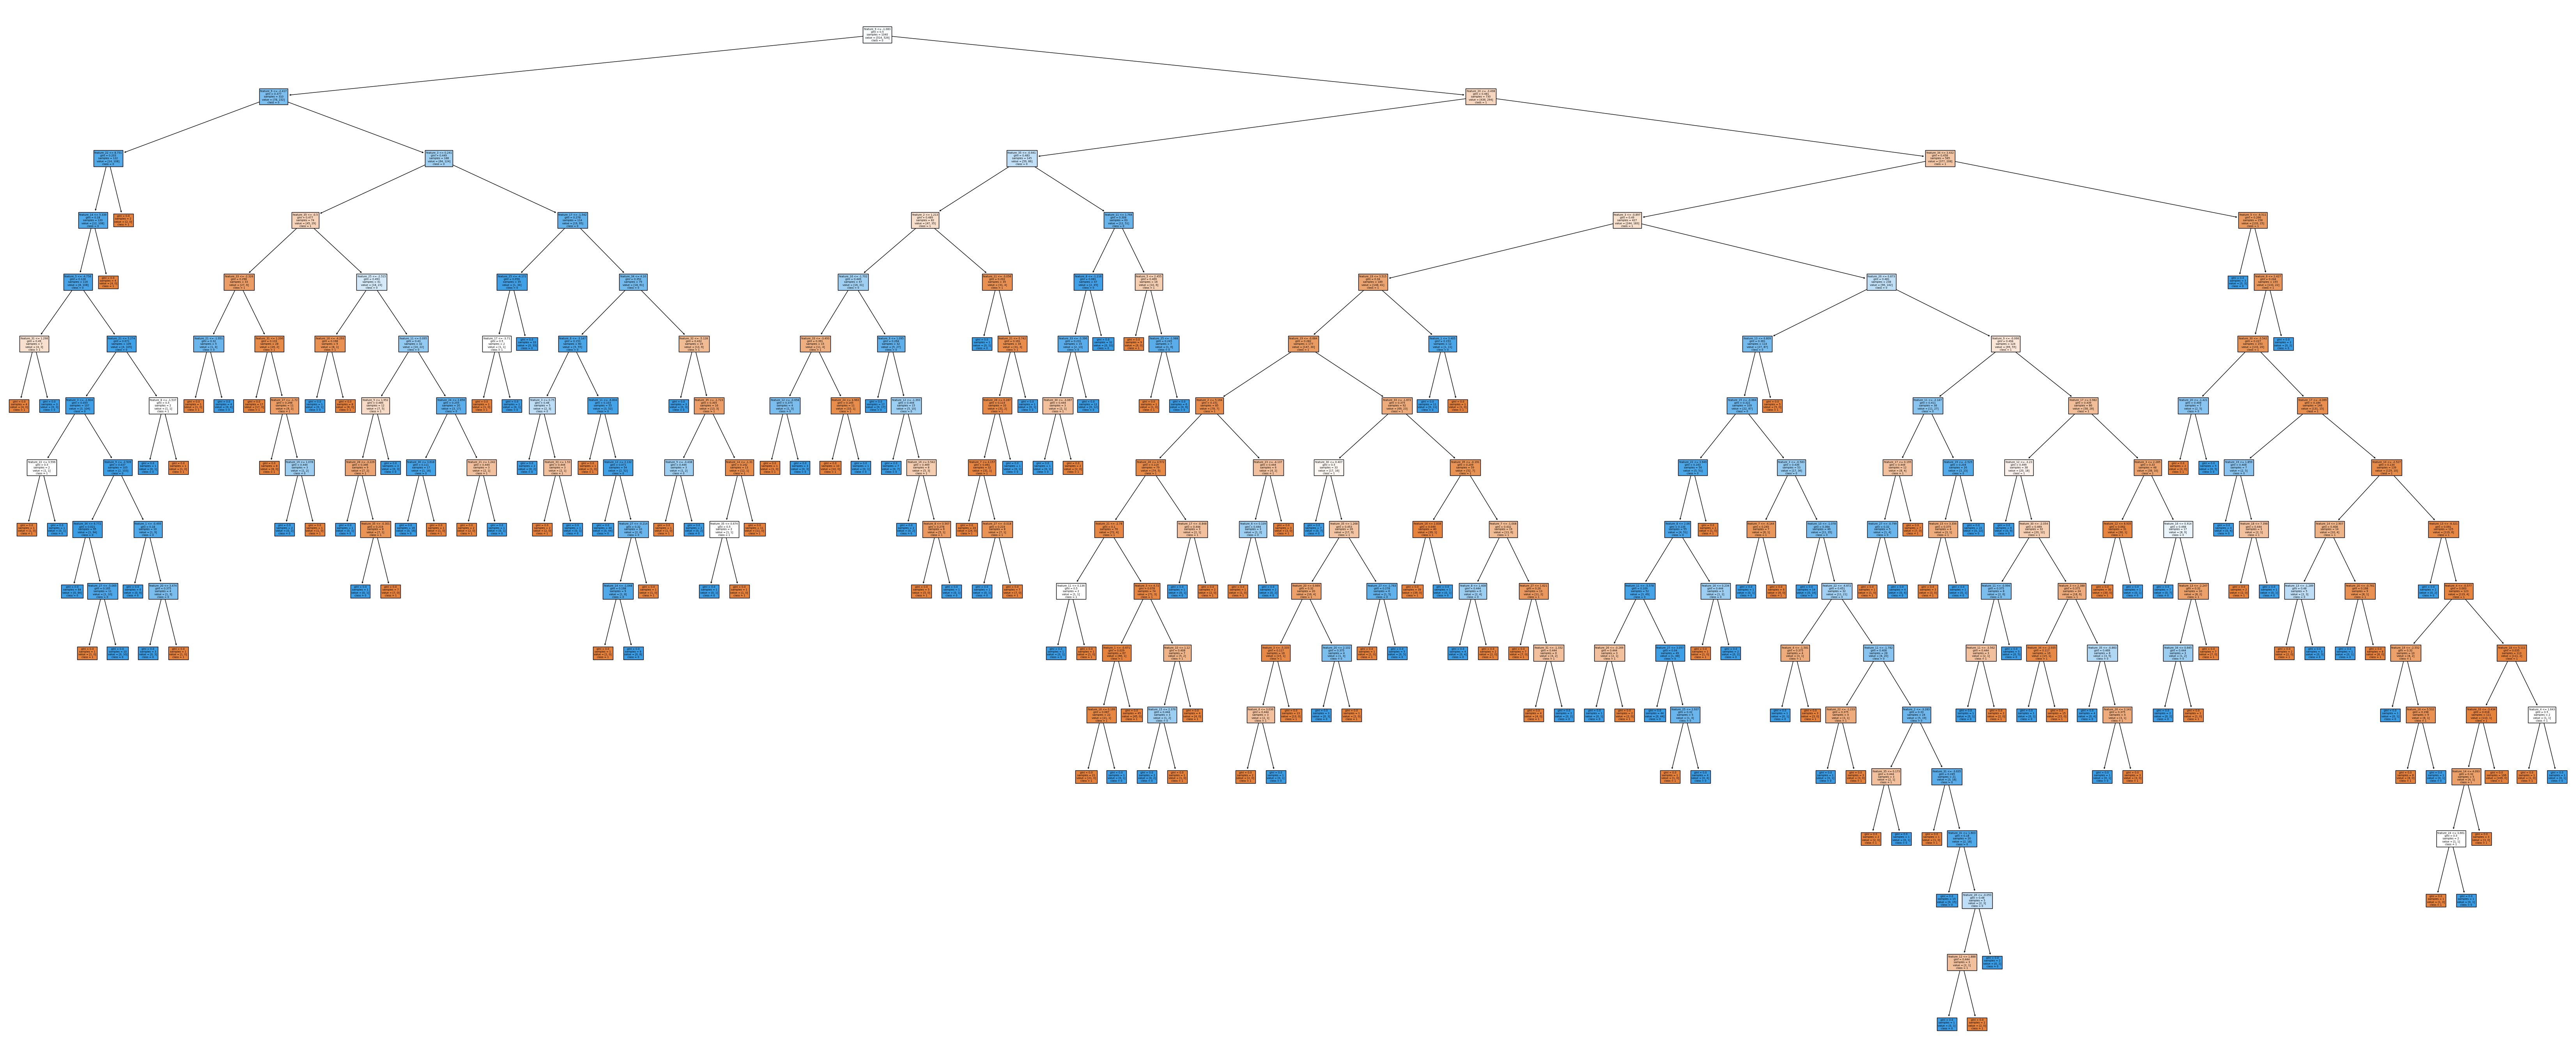

In [54]:
plt.figure(figsize=(85,35))
plot_tree(best_random.estimators_[0], feature_names = X.columns, class_names=['1', '0'], filled=True)
plt.show()

We can then plot the features in descending order of importance. Given the distribution of our data we expect small values.

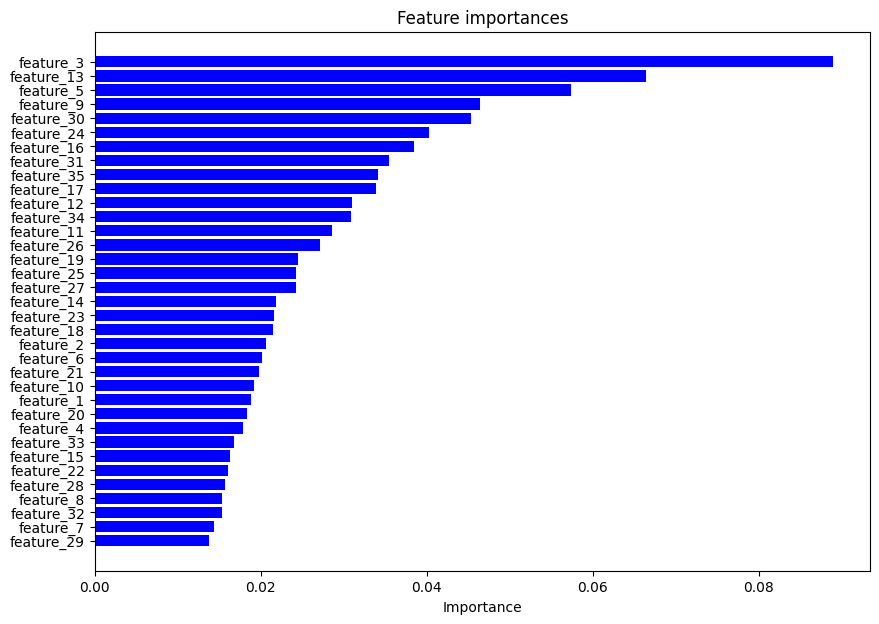

In [55]:
importances = best_random.feature_importances_

sorted_indices = np.argsort(importances)

plt.figure(figsize=(10,7))
plt.barh(range(len(importances)), importances[sorted_indices], color='b', align='center')
plt.yticks(range(len(importances)), np.array(X_train.columns)[sorted_indices])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.show()


#Predictions

In [56]:
df_pred = pd.read_csv("mldata_0003161098.TEST_FEATURES.csv") 
df_fin = df_pred.iloc[: , 1:]
df_fin

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0     -0.490844   1.081665  -4.196609   3.206634  -2.247804  -0.377757   
1      0.935410   1.390375  -4.198667   1.345491  -1.421338  -2.083984   
2     -1.617582   1.070575  -7.066391   2.778270   3.423231  -3.034695   
3     -1.795113   2.740888  -2.879187   0.954715   0.350637   1.541670   
4     -0.406300  -0.643821  -1.881543   0.745864   0.566353   0.202608   
...         ...        ...        ...        ...        ...        ...   
1295  -3.804545   1.133606  -6.619728   0.354896   0.508609   1.989240   
1296  -2.352247   0.287451  -3.443001   5.999016   0.700191  -0.137301   
1297   1.047256  -2.855625   1.594140  -5.445459   5.723445   1.463889   
1298  -0.388903   1.062355   3.150004  -2.590858   0.764220   2.375347   
1299  -0.974479   0.586313   1.646210   4.507107   0.940125  -1.493208   

      feature_7  feature_8  feature_9  feature_10  ...  feature_26  \
0     -0.877444   2.340143   0.560355   -2.233234  ...   -0.502345   
1      0.668732   0.266897  -0.072232   -4.427409  ...   -2.231243   
2     -3.060003   1.848289  -2.294272   -0.514029  ...   -1.357446   
3      2.694661   0.478033   2.614578    1.018746  ...   -0.706475   
4     -1.740659   0.170483  -0.627995    0.950034  ...    3.198521   
...         ...        ...        ...         ...  ...         ...   
1295  -3.000880   1.013834  -1.146371    5.027810  ...    2.343030   
1296   0.349377  -2.230069   3.653555   -0.478174  ...    2.505602   
1297   0.356579  -1.719796  -0.482958    4.465945  ...   -2.321844   
1298  -2.027849  -0.403833  -3.035815    8.033864  ...   -0.233338   
1299   1.445392   1.852970  -3.191125   -0.896517  ...    3.425395   

      feature_27  feature_28  feature_29  feature_30  feature_31  feature_32  \
0       1.325827   -0.778216   -0.549971    0.465728   -1.598180    0.885711   
1       3.237072    0.660814   -0.910504   -1.540699   -3.674517   -3.338200   
2      -1.539884    1.834886   -1.792073    0.251454    0.975980   -1.010693   
3       4.633706   -5.674841    0.723184    1.604840   -4.475842   -1.425782   
4      -1.166525    0.685742    1.145201    2.173560   -1.196315   -4.775909   
...          ...         ...         ...         ...         ...         ...   
1295   -1.421542   -0.234473   -3.392728    1.078290   -2.057084   -5.174299   
1296   -4.411521   -2.546482    2.282587    2.866082    0.950124    1.224674   
1297   -1.666935    4.405963   -1.743729   -1.874529   -1.314641    0.680514   
1298   -2.993151    8.308547   -4.828226   -3.080345   -1.649338   -3.321686   
1299    0.549606   -2.027039    0.850263   -4.540296   -0.867189    0.112057   

      feature_33  feature_34  feature_35  
0      -1.522602    4.441732    0.670147  
1       1.185697    4.661899    2.055230  
2      -2.242955    1.397586    2.179670  
3      -3.079802    1.635209   -1.974713  
4      -0.539137    3.342719   -0.253654  
...          ...         ...         ...  
1295    2.605250    4.570327   -3.484104  
1296   -5.310036   -3.057342   -2.114314  
1297   -0.551437   -4.188529    1.200354  
1298   -1.797275   -2.239385    1.138429  
1299   -2.591824    3.732222    1.594942  

[1300 rows x 35 columns]

In [57]:
scaler = StandardScaler()
df_fin_stand = scaler.fit_transform(df_fin)

In [58]:
y_pred = svm_opt.predict(df_fin_stand)
np.set_printoptions(threshold=np.inf)
print(y_pred)

[0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1
 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1
 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0
 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1
 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1
 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1
 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0
 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0
 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1
 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0
 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1
 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 1 0 

In [59]:
with open('test_predictions.txt', 'w') as f:
    for i in y_pred:
        f.write("%s\n" % i)

#Conclusion

We began our project by taking a closer look at our dataset. There were no missing values and we saw that the label column is balanced between the two classes. We looked at the distribution of the feature columns as well as at the statistical summary of our dataset. Then we visualized the data to see if there were any clear distinctions between classes. Moreover, the dimensionality reductions we tried didn't find any significant differences between the labels.

At this point, we started implementing Support Vector Machine (SVM) and Random Forest classifiers. Initially, we inclined towards the Random Forest classifier because it got an accuracy rate of approximately 88%, outperforming the Linear SVM's 82%. The parameters we settled on for this model were RandomForestClassifier(n_estimators = 389, min_samples_split = 2, min_samples_leaf = 1, bootstrap = False). 

However, upon deeper exploration and optimization of the SVM classifier, we achieved a significantly improved outcome. Using a combination of Randomized Grid Search and the radial basis function (rbf) kernel with the scaled dataset, we managed to attain an impressive accuracy rate of around 96%. As a result, we decided to choose this classifier for our predictions. The selected parameters included svm_opt = SVC ( C =  1.592282793341094, gamma= 0.08111308307896872, kernel = 'rbf', random_state = 45 ), with the remaining parameters kept at their default values. 

We should note that we did not anticipate perfect performance, as, from the beginning, distinguishing clusters based on labels was difficult. The tuning of hyperparameters played a critical role in boosting our model's performance. Specifically, the Randomized Grid Search helped us achieve a notable increase in accuracy. 

While trying to find the most suitable parameters for our dataset, we also took the models' computational cost into consideration and selected those parameters that appeared to contribute more significantly in the increasing of the performance.